# Climate portfolio post

Your turn!

## Pick a new location and/or measurement to plot
🌏 📈

Recreate the workflow you just did in a place that interests you OR with
a different measurement. You will need to make your own new Markdown and
Code cells below this one, or create a new notebook.

Your analysis should include:

1.  A researched (with citations or links) **site description**,
    including *why* you chose the site
2.  A researched (with citations or links) **data description**,
    including a **data citation**
3.  A researched (with citations or links) **methods overview**
4.  Some kind of **visual evidence** (plot, chart, diagram) for your
    results
5.  A **headline and description** for the visual evidence that
    *interprets* your analysis and puts it *in context*

You should also delete the instructions before submitting a portfolio page.

To submit your portfolio post, we're going to do something a little different this week, to see if it is easier:

 1. Put it in your portfolio repository, along with any images or interactive html visualization
 2. Add a markdown file to the `posts/02-climate` folder that contains a link to your portfolio.

In [44]:
# Import required packages
import pandas as pd
#Imports csv file of SNOTEL data from the site Widtsoe #3 called W3. File contains ALL data from snotel site
w3 = ('https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customSingleStationReport/daily/865:UT:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END/WTEQ::value,PREC::value,TMAX::value,TMIN::value,TAVG::value,PRCP::value#3')
w3

'https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customSingleStationReport/daily/865:UT:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END/WTEQ::value,PREC::value,TMAX::value,TMIN::value,TAVG::value,PRCP::value#3'

In [45]:
#Code prints the names of columns in the csv file
#Pythin was not recognizing the Date column name when I tried to index date
w3_df = pd.read_csv(w3, on_bad_lines='skip')  # Skips problematic lines
print(w3_df.columns) # Python is reading the csv now, but it's reading the first, comment-out line as the column header


Index(['#------------------------------------------------- WARNING --------------------------------------------'], dtype='object')


In [93]:
# Download climate data from Boulder, CO

w3_df = pd.read_csv(
    W3,
    comment='#',  # this is the command to use when there is commented-out text in thebeginning of a csv file
    index_col= 'Date', # sets date column as the index.  What does it mean to set a variable as an index? why use it?
    parse_dates=True, # tells python this data set is a time-series data set
    na_values= ['NaN'] #tells Python how to handle missing data
    ) 

w3_df

,Snow Water Equivalent (in) Start of Day Values,Precipitation Accumulation (in) Start of Day Values,Air Temperature Maximum (degF),Air Temperature Minimum (degF),Air Temperature Average (degF),Precipitation Increment (in)
Date,,,,,,
1978-10-01,0.0,0.0,NaN,NaN,NaN,0.0
1978-10-02,0.0,0.0,NaN,NaN,NaN,0.0
1978-10-03,0.0,0.0,NaN,NaN,NaN,0.0
1978-10-04,0.0,0.0,NaN,NaN,NaN,0.0
1978-10-05,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2024-09-28,0.0,25.0,72.0,51.3,60.1,0.0
2024-09-29,0.0,25.0,73.0,51.8,60.4,0.1
2024-09-30,0.0,25.1,72.9,50.9,59.4,0.0


In [94]:
print(w3_df.columns) # the correct information is appearing as the column headers now
type(w3_df) # verifies we have created a pandas dataframe

Index(['Snow Water Equivalent (in) Start of Day Values',
       'Precipitation Accumulation (in) Start of Day Values',
       'Air Temperature Maximum (degF)', 'Air Temperature Minimum (degF)',
       'Air Temperature Average (degF)', 'Precipitation Increment (in)'],
      dtype='object')


pandas.core.frame.DataFrame

In [95]:
# Select only the potential variables of interest: Daily SWE, Daily water year accumulated precipitation and daily average air temp
w3_df = w3_df[['Snow Water Equivalent (in) Start of Day Values', 'Precipitation Accumulation (in) Start of Day Values', 'Air Temperature Average (degF)']]
# renames columns
w3_df.rename(columns={'Snow Water Equivalent (in) Start of Day Values':'swe', 'Precipitation Accumulation (in) Start of Day Values':'precip', 'Air Temperature Average (degF)':'temp'}, inplace=True)
w3_df

/tmp/ipykernel_3978/127120505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w3_df.rename(columns={'Snow Water Equivalent (in) Start of Day Values':'swe', 'Precipitation Accumulation (in) Start of Day Values':'precip', 'Air Temperature Average (degF)':'temp'}, inplace=True)


,swe,precip,temp
Date,,,
1978-10-01,0.0,0.0,NaN
1978-10-02,0.0,0.0,NaN
1978-10-03,0.0,0.0,NaN
1978-10-04,0.0,0.0,NaN
1978-10-05,0.0,0.0,NaN
...,...,...,...
2024-09-28,0.0,25.0,60.1
2024-09-29,0.0,25.0,60.4
2024-09-30,0.0,25.1,59.4


In [97]:
import holoviews as hv
import hvplot.pandas
# # Plot the data using .plot. Initial exploration of data. Commented-out for final assignment
# w3_df.plot(
#     y='temp',
#     title='Daily average temperature for Widtsoe #3, Utah (1979-2024)',
#     xlabel='Date',
#     ylabel='Temperature ($^\circ$F)',
#     legend=False)
# w3_df.plot(
#     y='precip',
#     title='Daily precipitation for Widtsoe #3, Utah (1979-2024)',
#     xlabel='Date',
#     ylabel='Precipitation (inches)',
#     legend=False)
# w3_df.plot(
#     y='swe',
#     title='Daily total SWE for Widtsoe #3, Utah (1979-2024)',
#     xlabel='Date',
#     ylabel='SWE (inches)',
#     legend=False)


In [99]:

# Resample the DataFrame to get the maximum value for each year
w3_max_df = w3_df.resample('Y').max()
# Display the resulting DataFrame
#w3_max_df


<Axes: title={'center': 'Daily total SWE for Widtsoe #3, UT (1979-2024)'}, xlabel='Date', ylabel='SWE (inches)'>

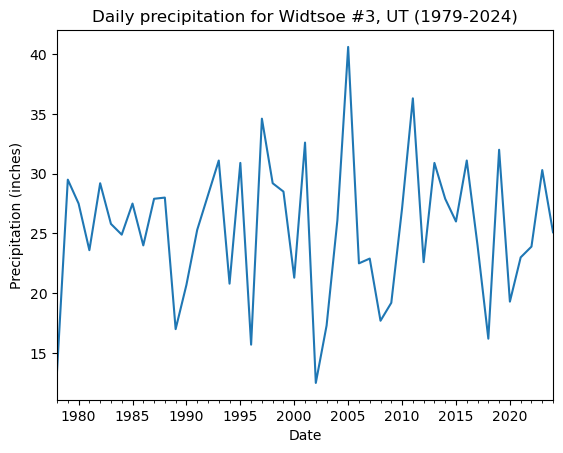

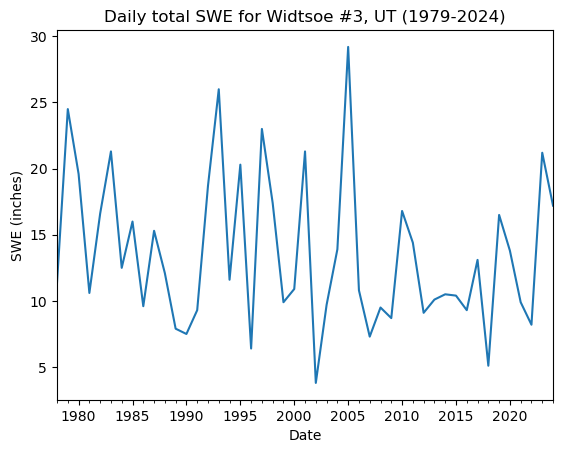

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data using .plot

w3_max_df.plot(
    y='precip',
    title='Daily precipitation for Widtsoe #3, UT (1979-2024)',
    xlabel='Date',
    ylabel='Precipitation (inches)',
    legend=False)
w3_max_df.plot(
    y='swe',
    title='Daily total SWE for Widtsoe #3, UT (1979-2024)',
    xlabel='Date',
    ylabel='SWE (inches)',
    legend=False)


<Axes: ylabel='Frequency'>

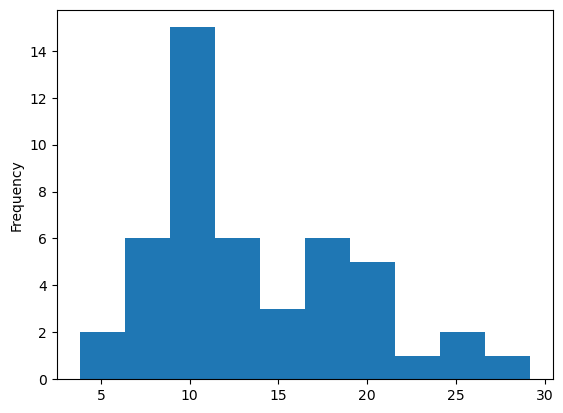

In [102]:
#import package used for linear regression
from sklearn.linear_model import LinearRegression
#sets year as the indexed variable. This is needed to be able to use year as the independent variable in regression
w3_max_df.index.year.values.astype('float')
w3_max_df.swe.plot.hist()# histogram of SWE data to check for normality. Data appears to be left-skewed, but is otherwise normally distributed


In [103]:
#Fit an OLS Linear Regression to the data
# Reshape data 2D array for scikit-learn
predictor = w3_max_df.index.year.values.reshape(-1,1)
observed = w3_max_df['swe'].values

# # Create and fit the linear regression model
model = LinearRegression()
model.fit(predictor, observed)

# # Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# # Predict temperatures based on the linear model
#predicted_temperatures = model.predict(predictor)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")



Slope: -0.08356845513413505
Intercept: 180.79920212765956


In [104]:
import statsmodels.api as sm

#add a constant term to the independent variable (for intercept)
predictor = sm.add_constant (predictor)
# print model summary
model = sm.OLS(observed,predictor).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.842
Date:                Wed, 02 Oct 2024   Prob (F-statistic):              0.182
Time:                        21:52:56   Log-Likelihood:                -147.69
No. Observations:                  47   AIC:                             299.4
Df Residuals:                      45   BIC:                             303.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.7992    123.222      1.467      0.1

In [105]:

# Ensure the index is a DatetimeIndex
w3_max_df.index = pd.to_datetime(w3_max_df.index)
# Create a new column 'year' by extracting the year from the index
w3_max_df['year'] = w3_max_df.index.year

#Was having trobule running the regression model because year was not defined. 
# The above code extracts year from the indexed 'date' and creates a new column called 'year'



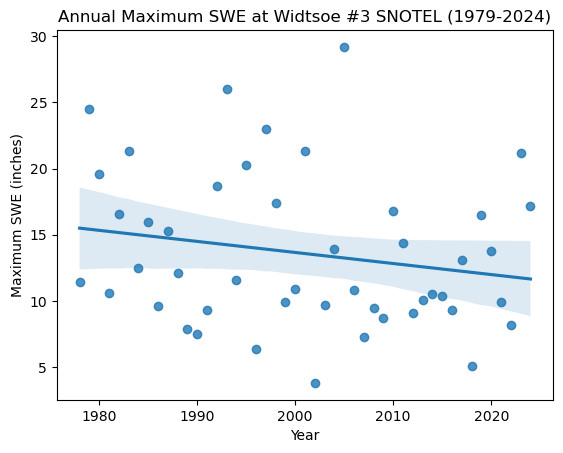

In [107]:
# Plot annual average temperature data with a trend line. sns.regplot is a 

ax = sns.regplot(
    x= w3_max_df.year, 
    y=w3_max_df.swe,
    )
# Set plot labels
ax.set(
    title='Annual Maximum SWE at Widtsoe #3 SNOTEL (1979-2024)',
    xlabel='Year',
    ylabel='Maximum SWE (inches)'
)
# Display the plot without extra text
plt.show()